In [2]:
import random
import math
import matplotlib.pyplot as plt

In [70]:
class Solution:
  def __init__(self, randomize_genes = False):
    self.genes = [0] * 16
    if randomize_genes:
     for i in range(16):
      if random.random() < 0.5:
        self.genes[i] = 0
      else:
        self.genes[i] = 1

  # funkcja przystosowania:
  def get_adaptation(self):
    number = int("".join(str(x) for x in self.genes), 2) / 2.**15 # sprytny sposób na konwersję wektora bitów do liczby całkowitej w jednej linijce
    return math.sin(100*number+0.1)+number**(-number)+0.2
  
  # krzyżowanie jednopunktowe z innym osobnikiem:
  def crossover(self, other_solution):
    cut_position = random.randint(0,15)
    new_solution = Solution()
    new_solution.genes[0:cut_position] = self.genes[0:cut_position]
    new_solution.genes[cut_position:] = other_solution.genes[cut_position:]
    return new_solution

  # mutacja przez obrót bitu na losowej pozycji:
  def mutation(self):
    mutation_position = random.randint(0,15)
    if self.genes[mutation_position] == 1:
      self.genes[mutation_position] = 0
    else:
      self.genes[mutation_position] = 1
    
  
  def binary_to_gray(self):
    number = int("".join(str(x) for x in self.genes), 2) # convert to int
    number ^= (number >> 1)
    number = bin(number)[2:]
    print(number, type(number))
    return number

**Dla roznych szans mutacji**

-----
average maximum:  2.626631787253318 average x coordinate:  0.4542948404947917
Best solution:  [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]  =  0.391693115234375  (correct: 0.392)
Found in iteration:  9
Largest function value found:  2.6435778843845172  (correct:  2.644)


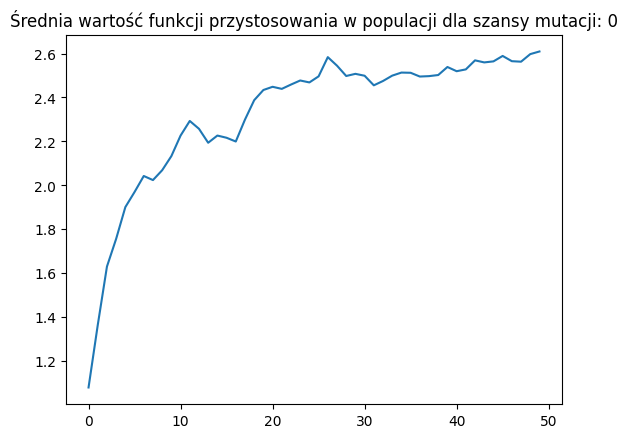

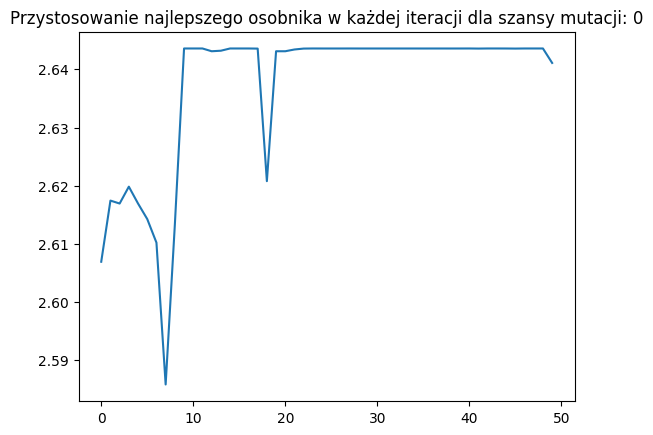

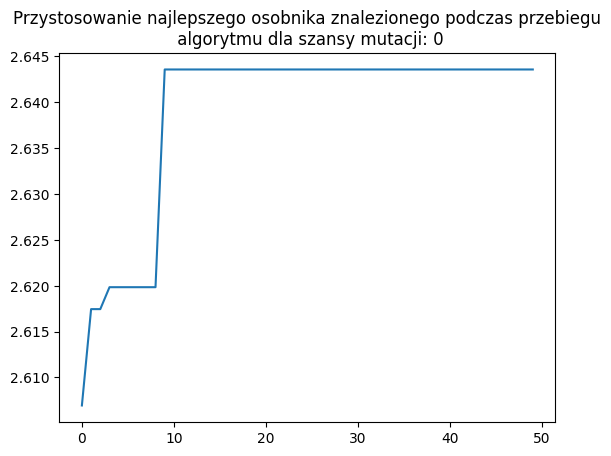

-----
average maximum:  2.6300369265164183 average x coordinate:  0.41253662109375
Best solution:  [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1]  =  0.517486572265625  (correct: 0.392)
Found in iteration:  12
Largest function value found:  2.606143748476641  (correct:  2.644)


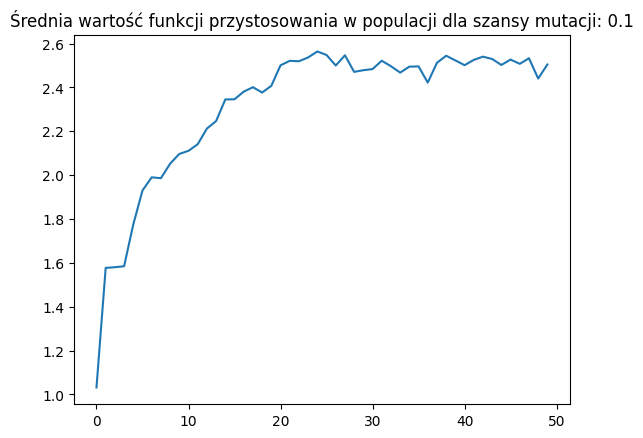

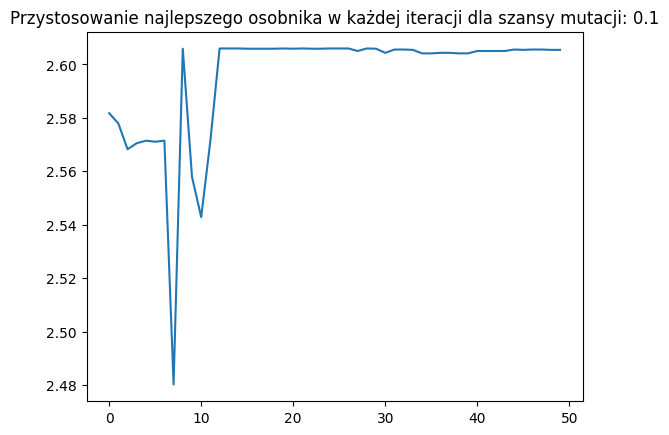

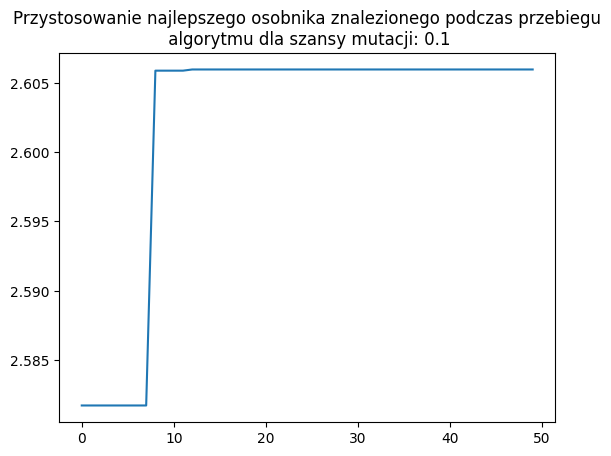

-----
average maximum:  2.6427043895909996 average x coordinate:  0.3915303548177083
Best solution:  [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1]  =  0.391876220703125  (correct: 0.392)
Found in iteration:  29
Largest function value found:  2.643404534182322  (correct:  2.644)


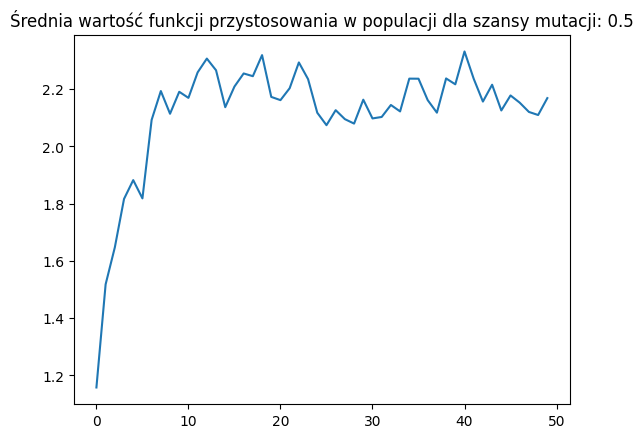

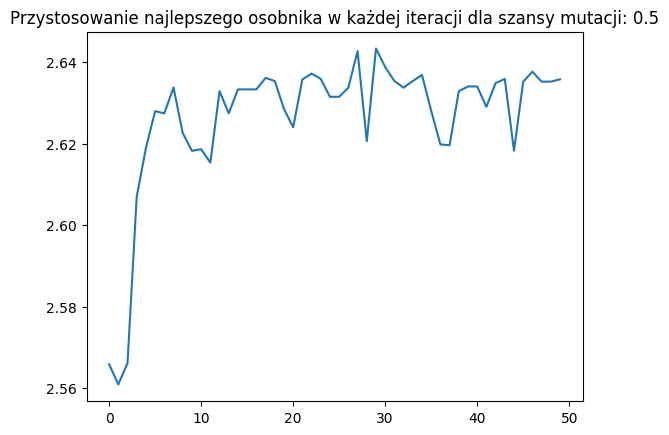

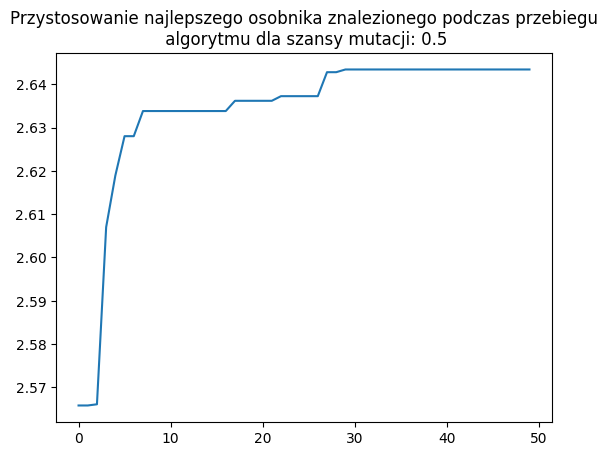

-----
average maximum:  2.643546200871452 average x coordinate:  0.3917134602864583
Best solution:  [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]  =  0.391693115234375  (correct: 0.392)
Found in iteration:  47
Largest function value found:  2.6435778843845172  (correct:  2.644)


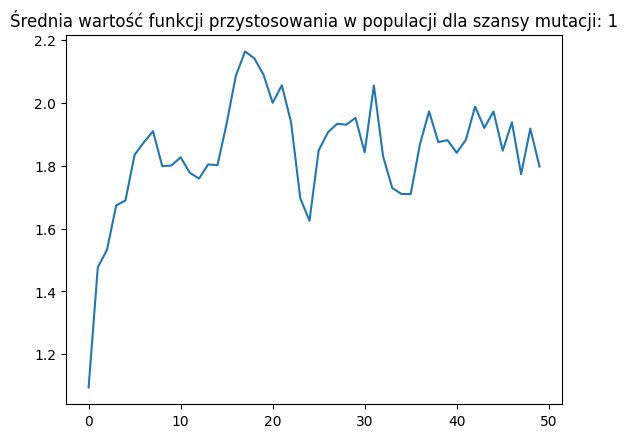

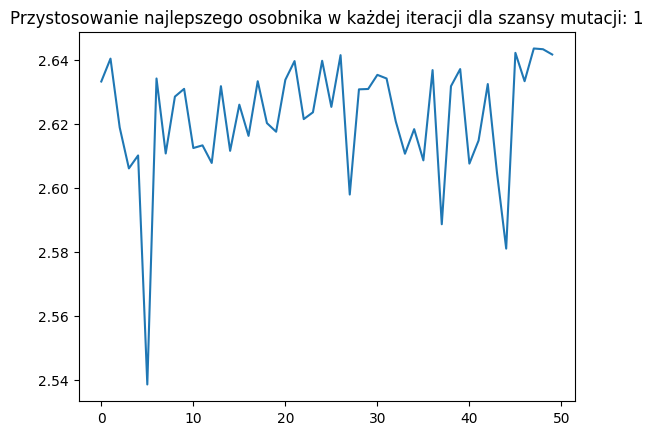

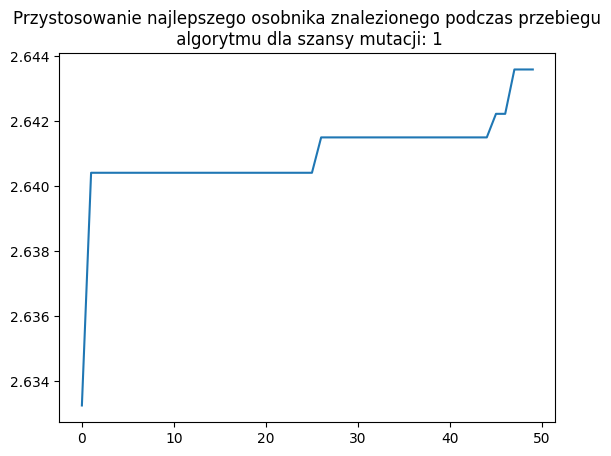

In [71]:
population_size = 50
iterations = 50
# mutation_chance = 0.2

for mutation_chance in [0,0.1,0.5,1]:
  avg_solution = 0.
  avg_zero = 0.
  invocations = 3
  for _ in range(invocations):
# generujemy populację:
    population = [Solution(randomize_genes = True) for i in range(population_size)]

    # najlepszy osobnik znaleziony w ciągu całego algorytmu (na razie włóżmy tu zerowego):
    best_solution = Solution()
    best_solution_adaptation = 0.
    best_iteration_found = 0

    # stwórzmy tablice do wyrysowania później przebiegu algorytmu
    avgs = []
    bests_local = []
    bests_global = []

    for iteration in range(iterations):
      # tworzymy koło ruletki - każdemu osobnikowi odpowiada jego funkcja przystosowania
      adaptations = [p.get_adaptation() for p in population]

      # zapiszmy najlepszego osobnika
      local_best_solution = population[adaptations.index(max(adaptations))]
      if local_best_solution.get_adaptation() > best_solution_adaptation:
        best_solution = local_best_solution
        best_solution_adaptation = local_best_solution.get_adaptation()
        best_iteration_found = iteration

      # sprawdźmy, jak radzi sobie populacja
      # if iteration%10==0:
      #   print("Epoch: ", iteration, "; avg adaptation: ", sum(adaptations) / len(adaptations), "; best adaptation: ", max(adaptations), " best adaptation ever: ", best_solution_adaptation, " from iteration ", best_iteration_found)
      # zapiszmy dane
      avgs.append(sum(adaptations) / len(adaptations))
      bests_local.append(max(adaptations))
      bests_global.append(best_solution_adaptation)

      # tworzymy koło ruletki na podstawie funkcji przystosowania
      roulette_wheel = adaptations
      # dokonujemy normalizacji wyników, żeby w późniejszym etapie działania algorytmu dalej pojawiały się różnice między osobnikami
      for i in range(len(roulette_wheel)):
        roulette_wheel[i] -= min(adaptations)
        roulette_wheel[i] /= (max(adaptations)-min(adaptations))

      # tworzymy z populacji dwie listę, ważoną kołem ruletki
      parents = [random.choices(population, weights=roulette_wheel, k = 2) for i in range(population_size)]

      # tworzymy dzieci z par rodziców
      children = [p[0].crossover(p[1]) for p in parents]

      # dokonujemy losowej mutacji wśród dzieci
      for c in children:
        if random.random() < mutation_chance:
          c.mutation()

      # zastępujemy poprzednią populację:
      population = children

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    # sprawdźmy najlepszego osobnika po ostatnich zmianach populacji:
    adaptations = [p.get_adaptation() for p in population]
    local_best_solution = population[adaptations.index(max(adaptations))]
    if local_best_solution.get_adaptation() > best_solution_adaptation:
      best_solution = local_best_solution
      best_solution_adaptation = local_best_solution.get_adaptation()

    avg_solution += best_solution_adaptation
    avg_zero += int("".join(str(x) for x in best_solution.genes), 2) / 2**15.

  # wypiszmy najlepszego osobnika:

  print('-----')
  avg_solution /= invocations
  avg_zero /= invocations
  print('average maximum: ', avg_solution, 'average x coordinate: ', avg_zero)
  print('Best solution: ', best_solution.genes, ' = ', int("".join(str(x) for x in best_solution.genes), 2) / 2**15., ' (correct: 0.392)')
  print('Found in iteration: ', best_iteration_found)
  print('Largest function value found: ', best_solution_adaptation, ' (correct:  2.644)')
  plt.plot(avgs)
  plt.title("Średnia wartość funkcji przystosowania w populacji dla szansy mutacji: "+str(mutation_chance))
  plt.show()
  print('    ')
  plt.plot(bests_local)
  plt.title("Przystosowanie najlepszego osobnika w każdej iteracji dla szansy mutacji: "+str(mutation_chance))
  plt.show()
  print('    ')
  plt.plot(bests_global)
  plt.title("Przystosowanie najlepszego osobnika znalezionego podczas przebiegu\n algorytmu dla szansy mutacji: "+str(mutation_chance))
  plt.show()

In [ ]:
# inicjalizujemy parametry:
population_size = 50
iterations = 50
mutation_chance = 0.2

# generujemy populację:
population = [Solution(randomize_genes = True) for i in range(population_size)]

# najlepszy osobnik znaleziony w ciągu całego algorytmu (na razie włóżmy tu zerowego):
best_solution = Solution()
best_solution_adaptation = 0.
best_iteration_found = 0

# stwórzmy tablice do wyrysowania później przebiegu algorytmu
avgs = []
bests_local = []
bests_global = []

for iteration in range(iterations):
  # tworzymy koło ruletki - każdemu osobnikowi odpowiada jego funkcja przystosowania
  adaptations = [p.binary_to_gray() for p in population]
  print(adaptations)

  # zapiszmy najlepszego osobnika
  local_best_solution = population[adaptations.index(max(adaptations))]
  if local_best_solution.get_adaptation() > best_solution_adaptation:
    best_solution = local_best_solution
    best_solution_adaptation = local_best_solution.get_adaptation()
    best_iteration_found = iteration

  # sprawdźmy, jak radzi sobie populacja
  # print("Epoch: ", iteration, "; avg adaptation: ", sum(adaptations) / len(adaptations), "; best adaptation: ", max(adaptations), " best adaptation ever: ", best_solution_adaptation, " from iteration ", best_iteration_found)

  # zapiszmy dane
  avgs.append(sum(adaptations) / len(adaptations))
  bests_local.append(max(adaptations))
  bests_global.append(best_solution_adaptation)

  # tworzymy koło ruletki na podstawie funkcji przystosowania
  roulette_wheel = adaptations
  # dokonujemy normalizacji wyników, żeby w późniejszym etapie działania algorytmu dalej pojawiały się różnice między osobnikami
  for i in range(len(roulette_wheel)):
    roulette_wheel[i] -= min(adaptations)
    roulette_wheel[i] /= (max(adaptations)-min(adaptations))

  # tworzymy z populacji dwie listę, ważoną kołem ruletki
  parents = [random.choices(population, weights=roulette_wheel, k = 2) for i in range(population_size)]

  # tworzymy dzieci z par rodziców
  children = [p[0].crossover(p[1]) for p in parents]

  # dokonujemy losowej mutacji wśród dzieci
  for c in children:
    if random.random() < mutation_chance:
      c.mutation()

  # zastępujemy poprzednią populację:
  population = children

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# sprawdźmy najlepszego osobnika po ostatnich zmianach populacji:
adaptations = [p.get_adaptation() for p in population]
local_best_solution = population[adaptations.index(max(adaptations))]
if local_best_solution.get_adaptation() > best_solution_adaptation:
  best_solution = local_best_solution
  best_solution_adaptation = local_best_solution.get_adaptation()

# wypiszmy najlepszego osobnika:

print('---')
print('Best solution: ', best_solution.genes, ' = ', int("".join(str(x) for x in best_solution.genes), 2) / 2**16., ' (correct: 0.264828)')
print('Found in iteration: ', best_iteration_found)
print('Largest function value found: ', best_solution_adaptation, ' (correct:  3.29484)')

**Selekcja progowa**

---
Best solution:  [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]  =  0.328887939453125  (correct: 0.39)
Found in iteration:  6
Largest function value found:  2.6415724011142663  (correct: 2.644)
---
Best solution:  [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]  =  0.391693115234375  (correct: 0.39)
Found in iteration:  4
Largest function value found:  2.6435778843845172  (correct: 2.644)
---
Best solution:  [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]  =  0.391571044921875  (correct: 0.39)
Found in iteration:  4
Largest function value found:  2.643507121987917  (correct: 2.644)
---
Best solution:  [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]  =  0.391571044921875  (correct: 0.39)
Found in iteration:  9
Largest function value found:  2.643507121987917  (correct: 2.644)
---
Best solution:  [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]  =  0.391693115234375  (correct: 0.39)
Found in iteration:  0
Largest function value found:  2.6435778843845172  (correct: 2.644)
---
Bes

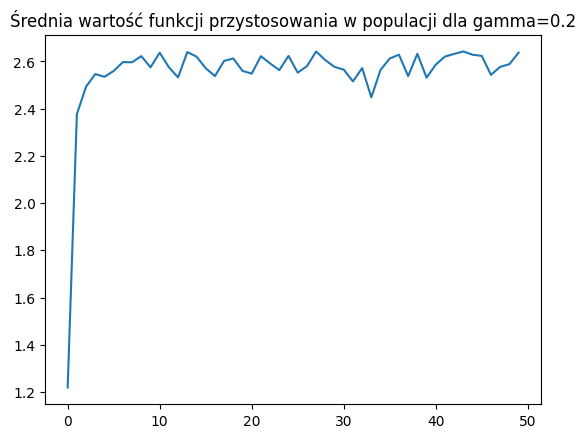

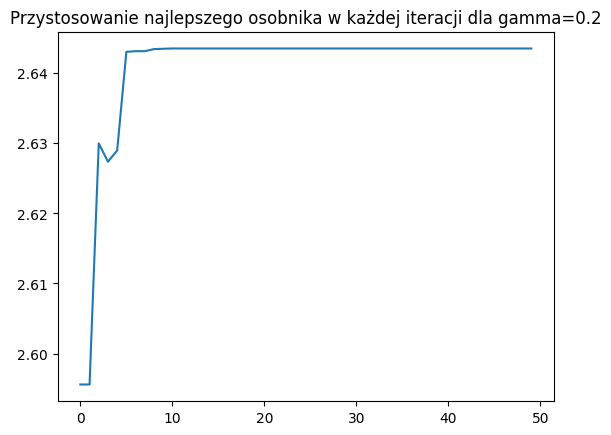

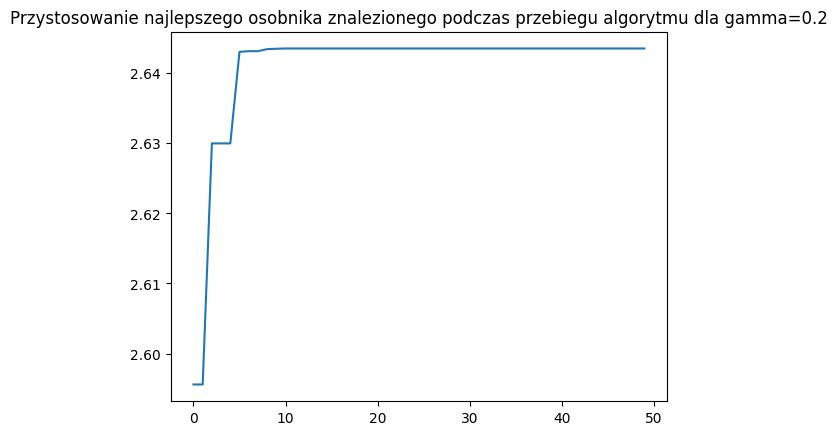

---
Best solution:  [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]  =  0.391693115234375  (correct: 0.39)
Found in iteration:  14
Largest function value found:  2.6435778843845172  (correct: 2.644)
---
Best solution:  [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]  =  0.391693115234375  (correct: 0.39)
Found in iteration:  25
Largest function value found:  2.6435778843845172  (correct: 2.644)
---
Best solution:  [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]  =  0.391693115234375  (correct: 0.39)
Found in iteration:  12
Largest function value found:  2.6435778843845172  (correct: 2.644)
---
Best solution:  [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]  =  0.391571044921875  (correct: 0.39)
Found in iteration:  17
Largest function value found:  2.643507121987917  (correct: 2.644)
---
Best solution:  [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]  =  0.391693115234375  (correct: 0.39)
Found in iteration:  18
Largest function value found:  2.6435778843845172  (correct: 2.644)
-

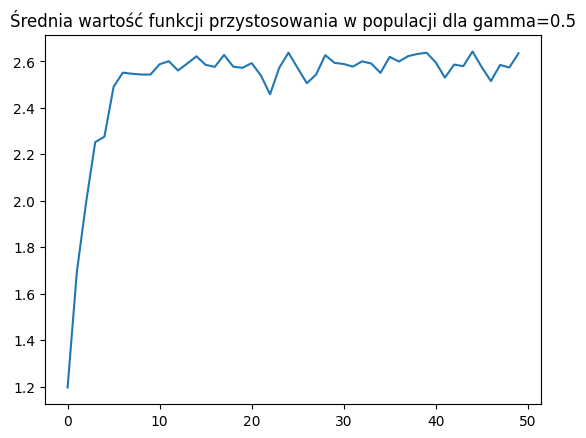

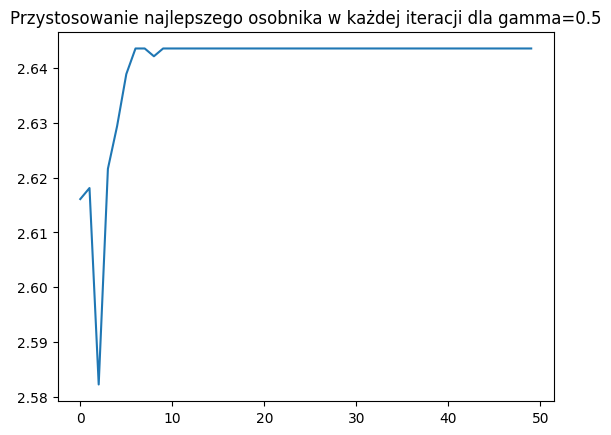

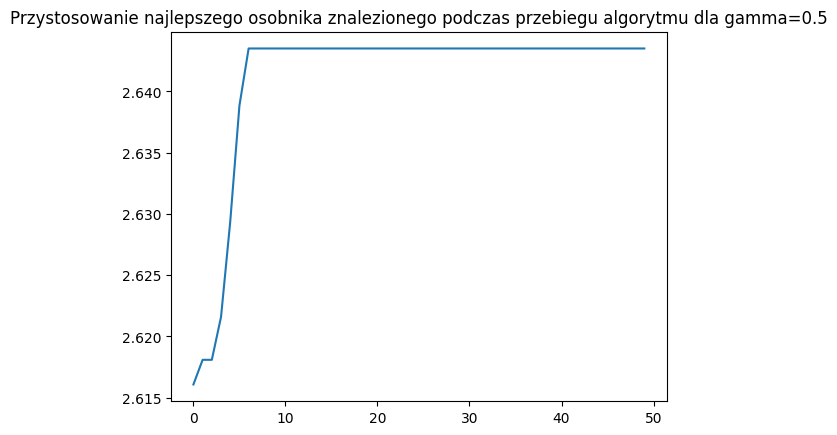

In [ ]:
# inicjalizujemy parametry:
population_size = 50
iterations = 50
mutation_chance = 0.2
new_length=population_size*0.2
iters=10

for part in [0.2, 0.5]:
  avg_x = 0.0
  avg_y = 0.0
  for i in range(iters):

  # generujemy populację:
    population = [Solution(randomize_genes = True) for i in range(population_size)]

    # najlepszy osobnik znaleziony w ciągu całego algorytmu (na razie włóżmy tu zerowego):
    best_solution = Solution()
    best_solution_adaptation = 0.
    best_iteration_found = 0

    # stwórzmy tablice do wyrysowania później przebiegu algorytmu
    avgs = []
    bests_local = []
    bests_global = []

    for iteration in range(iterations):
      # tworzymy koło ruletki - każdemu osobnikowi odpowiada jego funkcja przystosowania
      adaptations = [p.get_adaptation() for p in population]

      # zapiszmy najlepszego osobnika
      local_best_solution = population[adaptations.index(max(adaptations))]
      if local_best_solution.get_adaptation() > best_solution_adaptation:
        best_solution = local_best_solution
        best_solution_adaptation = local_best_solution.get_adaptation()
        best_iteration_found = iteration

      # sprawdźmy, jak radzi sobie populacja
      # print("Epoch: ", iteration, "; avg adaptation: ", sum(adaptations) / len(adaptations), "; best adaptation: ", max(adaptations), " best adaptation ever: ", best_solution_adaptation, " from iteration ", best_iteration_found)

      # zapiszmy dane
      avgs.append(sum(adaptations) / len(adaptations))
      bests_local.append(max(adaptations))
      bests_global.append(best_solution_adaptation)
      chances = [[population[i], adaptations[i]] for i in range(population_size)]
      chances.sort(key=lambda x: x[1], reverse=True)
      parents = [chances[i][0] for i in range(int(population_size*part))]
      parents = [random.choices(parents, k = 2) for i in range(population_size)]

    #   # tworzymy dzieci z par rodziców
      children = [p[0].crossover(p[1]) for p in parents]

      # dokonujemy losowej mutacji wśród dzieci
      for c in children:
        if random.random() < mutation_chance:
          c.mutation()

      # zastępujemy poprzednią populację:
      population = children

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    # sprawdźmy najlepszego osobnika po ostatnich zmianach populacji:
    adaptations = [p.get_adaptation() for p in population]
    local_best_solution = population[adaptations.index(max(adaptations))]
    if local_best_solution.get_adaptation() > best_solution_adaptation:
      best_solution = local_best_solution
      best_solution_adaptation = local_best_solution.get_adaptation()

    # wypiszmy najlepszego osobnika:
    avg_x += int("".join(str(x) for x in best_solution.genes), 2) / 2**15.
    avg_y += best_solution_adaptation

    print('---')
    print('Best solution: ', best_solution.genes, ' = ', int("".join(str(x) for x in best_solution.genes), 2) / 2**15., ' (correct: 0.39)')
    print('Found in iteration: ', best_iteration_found)
    print('Largest function value found: ', best_solution_adaptation, ' (correct: 2.644)')
  print('----\n average x for gamma=', part, ': ', avg_x/iters, ', average y: ', avg_y/iters, '\n')

  plt.plot(avgs)
  plt.title("Średnia wartość funkcji przystosowania w populacji dla gamma="+str(part))
  plt.show()
  print('    ')
  plt.plot(bests_local)
  plt.title("Przystosowanie najlepszego osobnika w każdej iteracji dla gamma="+str(part))
  plt.show()
  print('    ')
  plt.plot(bests_global)
  plt.title("Przystosowanie najlepszego osobnika znalezionego podczas przebiegu algorytmu dla gamma="+str(part))
  plt.show()


**Zadanie 2**

In [64]:
class Zadanie2:
  def __init__(self, randomize_genes = False):
    A = random.randint(1, 255)
    B = random.randint(1, 255)
    C = random.randint(1, 255)
    D = random.randint(1, 255)
    self.genes = [A,B,C,D]

  # funkcja przystosowania:
  def get_adaptation(self):
    return 5000 - 600*(self.genes[0] - 20)**2 * (self.genes[1] - 35)**2 * self.genes[2] - (self.genes[0] - 50)**2 * (self.genes[3] - 48)**2 + self.genes[3]
  
  # krzyżowanie jednopunktowe z innym osobnikiem:
  def crossover(self, other_solution):
    cut_position = random.randint(0,3)
    new_solution = Zadanie2()
    new_solution.genes[0:cut_position] = self.genes[0:cut_position]
    new_solution.genes[cut_position:] = other_solution.genes[cut_position:]
    return new_solution

  # mutacja przez obrót bitu na losowej pozycji:
  def mutation(self):
    index = random.randint(0,3)
    self.genes[index] = random.randint(1,255)

In [68]:
# inicjalizujemy parametry:
population_size = 50
iterations = 50
mutation_chance = 0.8

# generujemy populację:
population = [Zadanie2(randomize_genes = True) for i in range(population_size)]

# najlepszy osobnik znaleziony w ciągu całego algorytmu (na razie włóżmy tu zerowego):
best_solution = Zadanie2()
best_solution_adaptation = 0.
best_iteration_found = 0

# stwórzmy tablice do wyrysowania później przebiegu algorytmu
avgs = []
bests_local = []
bests_global = []

for iteration in range(iterations):
  # tworzymy koło ruletki - każdemu osobnikowi odpowiada jego funkcja przystosowania
  adaptations = [p.get_adaptation() for p in population]

  # zapiszmy najlepszego osobnika
  local_best_solution = population[adaptations.index(max(adaptations))]
  if local_best_solution.get_adaptation() > best_solution_adaptation:
    best_solution = local_best_solution
    best_solution_adaptation = local_best_solution.get_adaptation()
    best_iteration_found = iteration

  # sprawdźmy, jak radzi sobie populacja
  print("Epoch: ", iteration, "; avg adaptation: ", sum(adaptations) / len(adaptations), "; best adaptation: ", max(adaptations), " best adaptation ever: ", best_solution_adaptation, " from iteration ", best_iteration_found)

  # zapiszmy dane
  avgs.append(sum(adaptations) / len(adaptations))
  bests_local.append(max(adaptations))
  bests_global.append(best_solution_adaptation)

  # tworzymy koło ruletki na podstawie funkcji przystosowania
  roulette_wheel = adaptations
  # dokonujemy normalizacji wyników, żeby w późniejszym etapie działania algorytmu dalej pojawiały się różnice między osobnikami
  for i in range(len(roulette_wheel)):
    roulette_wheel[i] -= min(adaptations)
    # print(max(adaptations),min(adaptations), roulette_0wheel[i])
    roulette_wheel[i] /= (max(adaptations)-min(adaptations))

  # tworzymy z populacji dwie listę, ważoną kołem ruletki
  parents = [random.choices(population,  k = 2) for i in range(population_size)]

  # tworzymy dzieci z par rodziców
  children = [p[0].crossover(p[1]) for p in parents]

  # dokonujemy losowej mutacji wśród dzieci
  for c in children:
    if random.random() < mutation_chance:
      c.mutation()

  # zastępujemy poprzednią populację:
  population = children

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# sprawdźmy najlepszego osobnika po ostatnich zmianach populacji:
adaptations = [p.get_adaptation() for p in population]
local_best_solution = population[adaptations.index(max(adaptations))]
if local_best_solution.get_adaptation() > best_solution_adaptation:
  best_solution = local_best_solution
  best_solution_adaptation = local_best_solution.get_adaptation()

# wypiszmy najlepszego osobnika:

print('---')
print('Best solution: ', best_solution.genes, ' = ')
print('Found in iteration: ', best_iteration_found)
print('Largest function value found: ', best_solution_adaptation)

Epoch:  0 ; avg adaptation:  -14270076527334.94 ; best adaptation:  -44609612  best adaptation ever:  0.0  from iteration  0
Epoch:  1 ; avg adaptation:  -14873443804430.68 ; best adaptation:  -58010322  best adaptation ever:  0.0  from iteration  0
Epoch:  2 ; avg adaptation:  -18983506570644.4 ; best adaptation:  -374884668  best adaptation ever:  0.0  from iteration  0
Epoch:  3 ; avg adaptation:  -33551391072114.22 ; best adaptation:  -362702587  best adaptation ever:  0.0  from iteration  0
Epoch:  4 ; avg adaptation:  -16567524686698.54 ; best adaptation:  -2519440834  best adaptation ever:  0.0  from iteration  0
Epoch:  5 ; avg adaptation:  -13456594593094.8 ; best adaptation:  -359419567  best adaptation ever:  0.0  from iteration  0
Epoch:  6 ; avg adaptation:  -12006693986970.56 ; best adaptation:  -387606012  best adaptation ever:  0.0  from iteration  0
Epoch:  7 ; avg adaptation:  -11877162695689.26 ; best adaptation:  -281576428  best adaptation ever:  0.0  from iteratio